# Heavy Traffic Indicators on I-94

In this project, we're going to analyze a dataset about the westbound traffic on the I-94 Interstate highway.

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc.

The dataset available that we'll be working with has been made by John Hogue and is available at UCI Machine LEarning Repository

In [41]:
import pandas as pd

i94_data = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")


In [42]:
print(i94_data.head())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  


In [43]:
print(i94_data.tail())

      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0          90  Thunderstorm   
48202    None  282.09      0.0      0.0          90        Clouds   
48203    None  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
48199           broken clouds  2018-09-30 19:00:00            3543  
48200         overcast clouds  2018-09-30 20:00:00            2781  
48201  proximity thunderstorm  2018-09-30 21:00:00            2159  
48202         overcast clouds  2018-09-30 22:00:00            1450  
48203         overcast clouds  2018-09-30 23:00:00             954  


In [44]:
print(i94_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB
None


Looking at the details above, we can observe that The dataset has 48,204 rows and 9 columns, and there are no null values. Each row describes traffic and weather data for a specific hour — we have data from 2012-10-02 09:00:00 until 2018-09-30 23:00:00.

The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west).

This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.

# Analysing Traffic Volume

Let us start by analysing the distribution on traffic_vloume column

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

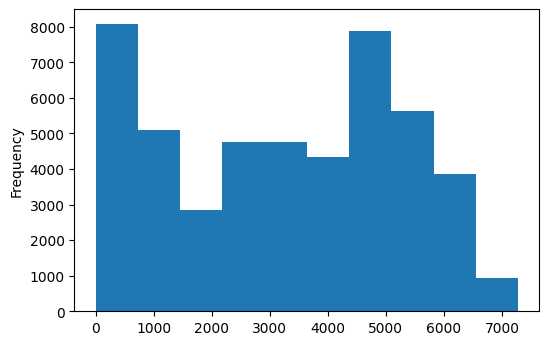

In [46]:
i94_data['traffic_volume'].plot.hist()
plt.show()

In [47]:
i94_data['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars.

About 25% of the time, there were only 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction. However, about 25% of the time, the traffic volume was four times as much (4,933 cars or more).

This observation gives our analysis an interesting direction: comparing daytime data with nighttime data.

# Traffic Volume: Day vs Night

We'll start by dividing the dataset into two parts:

* Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
* Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [48]:
import datetime as dt

In [49]:
i94_data['date_time'] = pd.to_datetime(i94_data['date_time'],format='%Y-%m-%d %H:%M:%S')

In [55]:
daytime = i94_data[((i94_data['date_time'].dt.hour) >= 7) & ((i94_data['date_time'].dt.hour) < 19)]
nighttime = i94_data[((i94_data['date_time'].dt.hour) >=  19) | ((i94_data['date_time'].dt.hour) < 7)]

Let us verify the data in both the datasets

In [56]:
daytime['date_time'].dt.hour.value_counts().sort_index()


7     2079
8     2080
9     2018
10    2078
11    1952
12    1955
13    1905
14    1969
15    1934
16    1988
17    1933
18    1986
Name: date_time, dtype: int64

In [57]:
nighttime['date_time'].dt.hour.value_counts().sort_index()

0     2037
1     2049
2     2019
3     2025
4     2091
5     2063
6     2087
19    1961
20    1979
21    1982
22    1994
23    2040
Name: date_time, dtype: int64

We can observe that the two datasets collectively account for a total of 24 hours. Let us now analyse the data for both datasets 

# Analysing Traffic Volume: Day vs Night

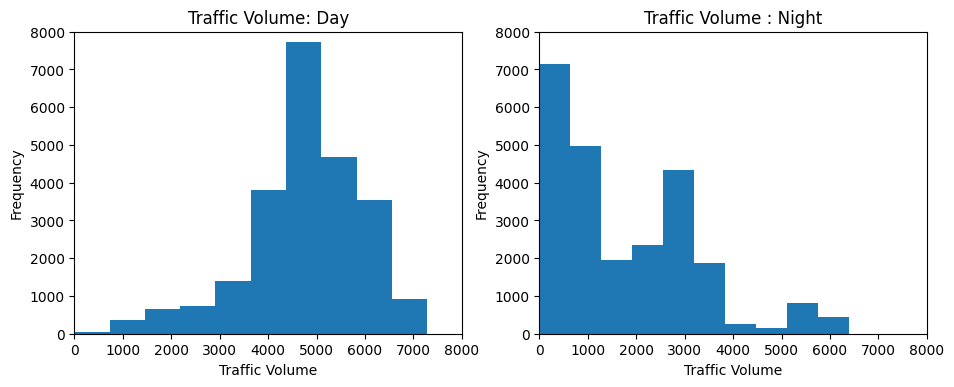

In [65]:
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
daytime['traffic_volume'].plot.hist()
plt.title('Traffic Volume: Day')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim(0,8000)
plt.ylim(0,8000)
plt.subplot(1,2,2)
nighttime['traffic_volume'].plot.hist()
plt.title('Traffic Volume : Night')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim(0,8000)
plt.ylim(0,8000)
plt.show()

The histogram that shows the distribution of traffic volume during the day is left skewed. This means that most of the traffic volume values are high — there are 4,252 or more cars passing the station each hour 75% of the time (because 25% of values are less than 4,252).

The histogram displaying the nighttime data is right skewed. This means that most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was less than 2,819.

Let us take a closer look at the summary for both the daytime and night time datasets

In [71]:
daytime['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [72]:
nighttime['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

From the data here, we can clearly see, the mean traffic volume for night is significantly lower compared to day! To find indicators of heavy traffic, let's just focus on the day time data for now.

# Traffic Volume by Months

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of day.

We're going to look at a few line plots showing how the traffic volume changes according to the following:

* Month
* Day of the week
* Time of day

In [73]:
daytime['month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-73-7d784f045492>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

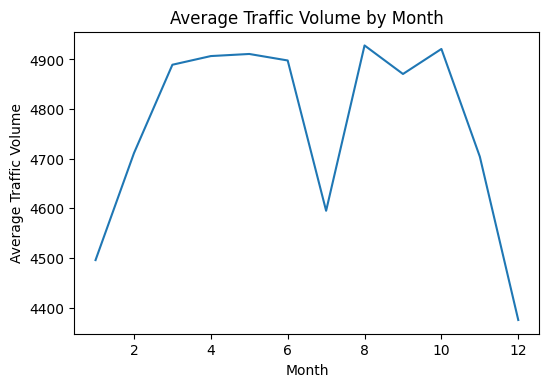

In [87]:
by_month['traffic_volume'].plot.line()
plt.title('Average Traffic Volume by Month')
plt.xlabel('Month')
plt.ylabel('Average Traffic Volume')
plt.show()

From the plot above, we can observe that traffic volumes decrease significantly around November.
They remain low until around February, which is when it starts increasing again.
This could be due to old weather and snow, which is expected in Minnesota 

An interesting exception here is July, where we can observe a significant drop. 
Let us analyse the yearly traffic volume change in July to try and address this anomaly

<ipython-input-89-778d74b3713d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



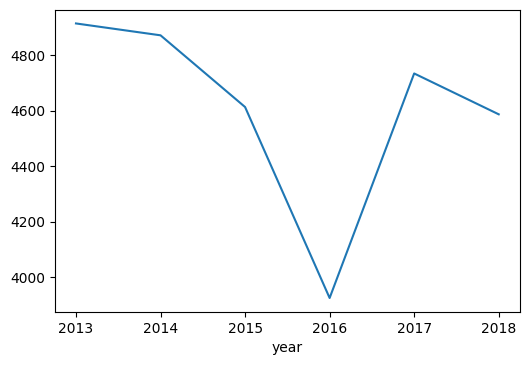

In [89]:
daytime['year'] = daytime['date_time'].dt.year
only_july = daytime[daytime['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

We can observe that the traffic is pretty heavy in July, similar to the other warm months. The only exception we see is 2016, which had a high decrease in traffic volume. This could be due to a construction activity or some repair work causing a detour from the road.

On an average, we can conclude that warm months generally show heavier traffic compared to cold months. In a warm month, traffic volume close to 5,000 cars can be expected.

# Traffic Volume by Day

Let us now check the traffic behaviour based on the days of the week.

In [95]:
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
day_of_week = daytime.groupby('dayofweek').mean()
day_of_week['traffic_volume'] 

<ipython-input-95-7730f53482cf>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

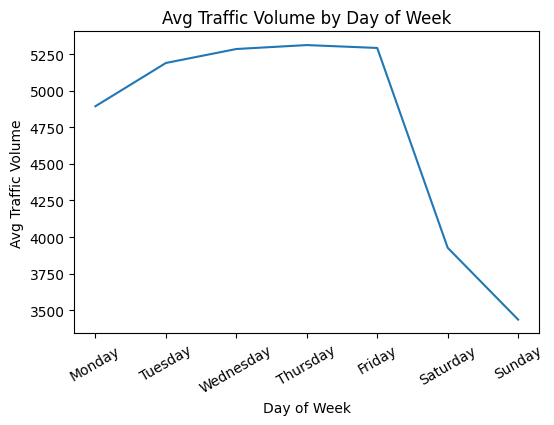

In [96]:
day_of_week['traffic_volume'].plot.line()
plt.xlabel('Day of Week')
plt.ylabel('Avg Traffic Volume')
plt.xticks(ticks=[0,1,2,3,4,5,6],
           labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
           rotation=30) # Here, 0 is Monday and 6 is Sunday
plt.title('Avg Traffic Volume by Day of Week')
plt.show()

As is evident from the graph above, traffic volume is significantly heavier on business days (Monday – Friday). Except for Monday, we only see values over 5,000 during business days. Traffic is lighter on weekends, with values below 4,000 cars

# Traffic Volume by Time of Day: Weekdays vs Weekends

Let's now see what values we have based on time of the day. Since there's a significant difference in traffic during the week compared to weekends, we're going to look only at the averages separately.


In [98]:
daytime['hour'] = daytime['date_time'].dt.hour
bussiness_days = daytime[daytime['dayofweek'] <= 4] # 4 == Friday
weekend = daytime[daytime['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


<ipython-input-98-9273382221be>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



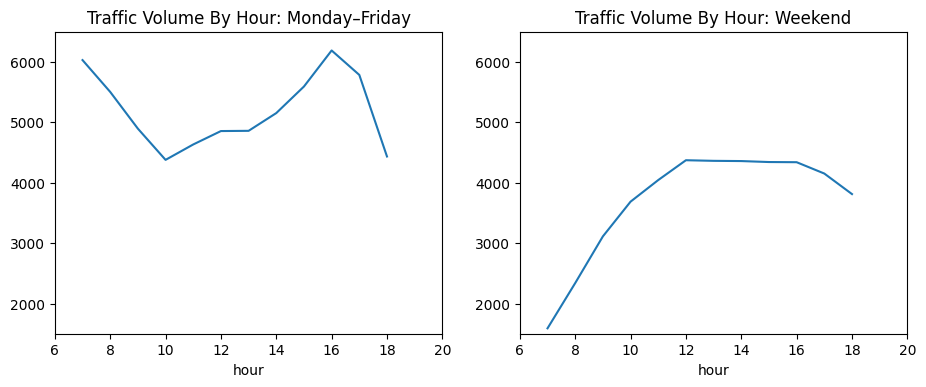

In [100]:
plt.figure(figsize=(11,4))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Monday–Friday')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Weekend')

plt.show()

At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. Also, the rush hours are around 7 and 16 — when most people travel from home to work and back. We see volumes of over 6,000 cars at rush hours.

For weekends, there is substantially less people driving during early morning hours, and in the afternoon there is a consistant volume of traffic on average.

Hence, we can draw the following concusions from our analysis thus far:
* The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
* The traffic is usually heavier on business days compared to weekends.
* On business days, the rush hours are around 7 and 16.

# Traffic Volumes and Weather

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

A few of these columns are numerical, so let's start by looking up their correlation values with traffic_volume.

In [102]:
daytime.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
hour              0.172704
month            -0.022337
year             -0.003557
dayofweek        -0.416453
Name: traffic_volume, dtype: float64

Temperature shows the strongest correlation with a value of just +0.13. The other relevant columns (rain_1h, snow_1h, clouds_all) don't show any strong correlation with traffic_value.

Let us generate a scatter plot for temperature and traffic_volume

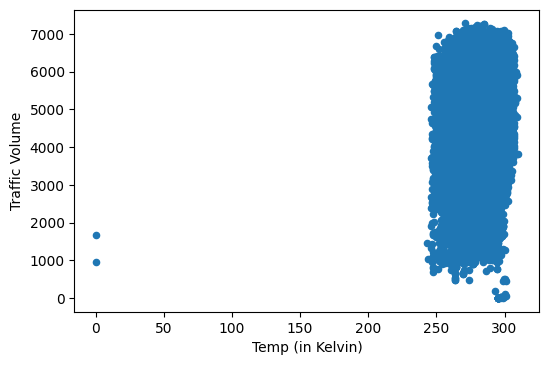

In [103]:
daytime.plot.scatter(x = 'temp', y = 'traffic_volume' )
plt.ylabel('Traffic Volume')
plt.xlabel('Temp (in Kelvin)')
plt.show()

From the graph above, it looks like we may have some data points recorded at 0 degrees Kelvin, also known as absolute zero. Let's drop these points and reassess the correlation coefficient

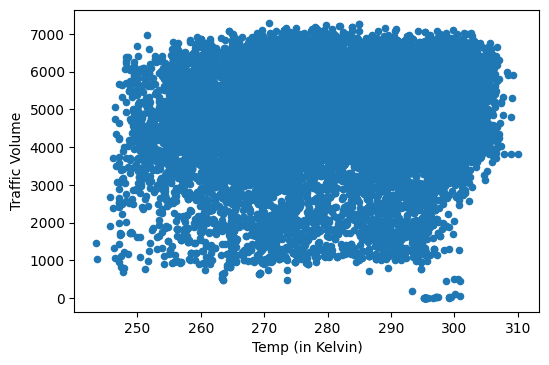

In [104]:
daytime=daytime[daytime['temp']>0]
daytime.plot.scatter(x = 'temp', y = 'traffic_volume' )
plt.ylabel('Traffic Volume')
plt.xlabel('Temp (in Kelvin)')
plt.show()


From the graph above, there does not seem to be any strong correlation between temperature and traffic_volume.
Overall, the weather columns don't seem like reliable indicators for heavy traffic.

Let's now look at the other weather-related columns: weather_main and weather_description.

# Weather Types

Our data set includes non-numeric information about weather patterns. Let's see if there is any connection between traffic volume and weather_main or weather_description. We'll use a similar strategy - grouping by weather patterns and calculating the mean traffic volumes - as we did with the day and hour.

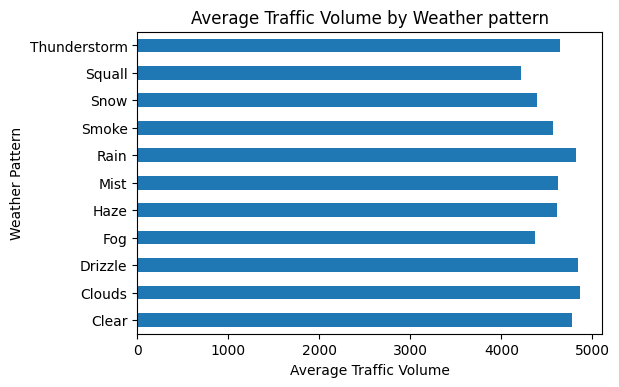

In [110]:
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.ylabel('Weather Pattern')
plt.xlabel('Average Traffic Volume')
plt.title('Average Traffic Volume by Weather pattern')
plt.show()

We already know that the average traffic volume during weekdays for daytime traffic is 4762 cars/hour. Looking at the bar plot above, there doesn't seem to be any weather that drastically deviates from that mean.

Let us now check by weather description. As the number of unique values is very high, let us sort those values to get a better looking graph.
This will help us understand better

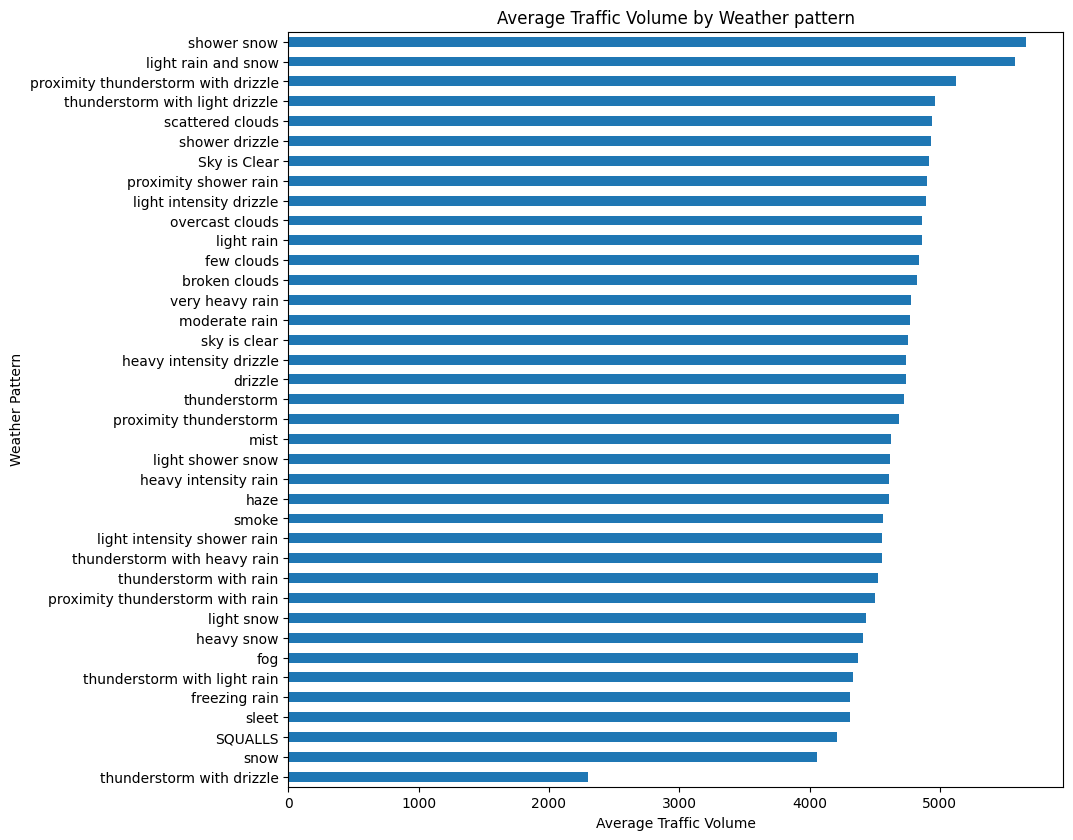

In [115]:
by_weather_description = daytime.groupby('weather_description').mean()
by_weather_description['traffic_volume'].sort_values().plot.barh(figsize= (10,10))
plt.ylabel('Weather Pattern')
plt.xlabel('Average Traffic Volume')
plt.title('Average Traffic Volume by Weather pattern')
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000:

* Shower snow
* Light rain and snow
* Proximity thunderstorm with drizzle

It's not clear why these weather types have the highest average traffic values. One explanation could be people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

However we also see 'thunderstorm with drizzle', 'snow', 'heavy snow', 'light snow', and 'freezing rain' with traffic volumes below the overall weekday daytime mean traffic volume of 4762 cars/hour.
This could be because people prefer staying indoors during these events as they are related to extreme bad weather situations. 

Overall, we can conclude that weather pattern is not a clear indicator of heavy traffic

# Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

Time indicators
* The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
* The traffic is usually heavier on business days compared to the weekends.
* On business days, the rush hours are around 7 and 16.

Weather indicators
* Shower snow
* Light rain and snow
* Proximity thunderstorm with drizzle

Of the two, we can see a clear pattern for time indicators when we analyze the graphs. 
For the weather indicators, it seems like intense weather may increase traffic or decrease traffic.
However,  the pattern isn't clear enough to draw a conclusion given the inconsistencies in our data.